In [762]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(city_data_df, ride_data_df, on="city", how="outer")
# Display the data table for preview
pyber_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [763]:
# Prepare datatable for analysis
pyber_df_type = pyber_df[["city", "type", "driver_count", "fare", "date"]]

In [764]:
# Select the types into three dataframes
pyber_df_rural = pyber_df_type.loc[pyber_df_type["type"] == "Rural"]
pyber_df_rural = pyber_df_rural.set_index(["city"])

pyber_df_suburban = pyber_df_type.loc[pyber_df_type["type"] == "Suburban"]
pyber_df_suburban = pyber_df_suburban.set_index(["city"])

pyber_df_urban = pyber_df_type.loc[pyber_df_type["type"] == "Urban"]
pyber_df_urban = pyber_df_urban.set_index(["city"])

# Prepare calculations for the scatterplot axes, area, and legend for each city type

# Rural type
pyber_df_rural["total_rides"] = pyber_df_rural.index.value_counts()
pyber_df_rural_total_rides = pyber_df_rural["total_rides"]
pyber_df_rural_total_rides = pyber_df_rural_total_rides.reset_index()
pyber_df_rural_total_rides = pyber_df_rural_total_rides.drop_duplicates(subset=["city"], keep="first")
pyber_df_rural_total_rides = pyber_df_rural_total_rides.set_index("city")
pyber_df_rural_total_rides = pyber_df_rural_total_rides.sort_values("city")

pyber_df_rural_average_fare = pyber_df_rural.groupby(["city"])
pyber_df_rural_average_fare = pyber_df_rural_average_fare["fare"].sum() / pyber_df_rural_average_fare["fare"].count()

pyber_df_rural_drivers_per_city = pyber_df_rural["driver_count"]
pyber_df_rural_drivers_per_city = pyber_df_rural_drivers_per_city.reset_index()
pyber_df_rural_drivers_per_city = pyber_df_rural_drivers_per_city.drop_duplicates(subset=["city"], keep="first")
pyber_df_rural_drivers_per_city = pyber_df_rural_drivers_per_city.set_index("city")
pyber_df_rural_drivers_per_city = pyber_df_rural_drivers_per_city.sort_values("city")

# Suburban type
pyber_df_suburban["total_rides"] = pyber_df_suburban.index.value_counts()
pyber_df_suburban_total_rides = pyber_df_suburban["total_rides"]
pyber_df_suburban_total_rides = pyber_df_suburban_total_rides.reset_index()
pyber_df_suburban_total_rides = pyber_df_suburban_total_rides.drop_duplicates(subset=["city"], keep="first")
pyber_df_suburban_total_rides = pyber_df_suburban_total_rides.set_index("city")
pyber_df_suburban_total_rides = pyber_df_suburban_total_rides.sort_values("city")

pyber_df_suburban_average_fare = pyber_df_suburban.groupby(["city"])
pyber_df_suburban_average_fare = pyber_df_suburban_average_fare["fare"].sum() / pyber_df_suburban_average_fare["fare"].count()

pyber_df_suburban_drivers_per_city = pyber_df_suburban["driver_count"]
pyber_df_suburban_drivers_per_city = pyber_df_suburban_drivers_per_city.reset_index()
pyber_df_suburban_drivers_per_city = pyber_df_suburban_drivers_per_city.drop_duplicates(subset=["city"], keep="first")
pyber_df_suburban_drivers_per_city = pyber_df_suburban_drivers_per_city.set_index("city")
pyber_df_suburban_drivers_per_city = pyber_df_suburban_drivers_per_city.sort_values("city")

# Urban Type
pyber_df_urban["total_rides"] = pyber_df_urban.index.value_counts()
pyber_df_urban_total_rides = pyber_df_urban["total_rides"]
pyber_df_urban_total_rides = pyber_df_urban_total_rides.reset_index()
pyber_df_urban_total_rides = pyber_df_urban_total_rides.drop_duplicates(subset=["city"], keep="first")
pyber_df_urban_total_rides = pyber_df_urban_total_rides.set_index("city")
pyber_df_urban_total_rides = pyber_df_urban_total_rides.sort_values("city")

pyber_df_urban_average_fare = pyber_df_urban.groupby(["city"])
pyber_df_urban_average_fare = pyber_df_urban_average_fare["fare"].sum() / pyber_df_urban_average_fare["fare"].count()

pyber_df_urban_drivers_per_city = pyber_df_urban["driver_count"]
pyber_df_urban_drivers_per_city = pyber_df_urban_drivers_per_city.reset_index()
pyber_df_urban_drivers_per_city = pyber_df_urban_drivers_per_city.drop_duplicates(subset=["city"], keep="first")
pyber_df_urban_drivers_per_city = pyber_df_urban_drivers_per_city.set_index("city")
pyber_df_suburban_drivers_per_city = pyber_df_suburban_drivers_per_city.sort_values("city")

#Bubble Plot of Ride Sharing Data

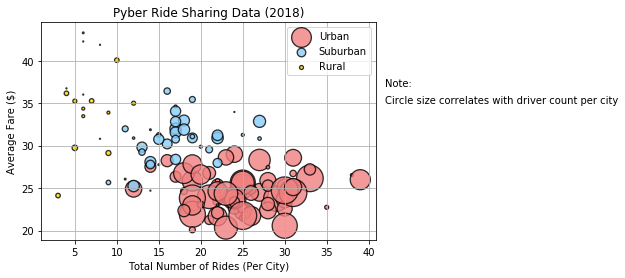

In [781]:
# Prepare variables for scatterplots, including sorting values, scaling the area by exponent 1.55, and setting company colors
x_rural = pyber_df_rural_total_rides.sort_values("city")
y_rural = pyber_df_rural_average_fare
rural_area = pyber_df_rural_drivers_per_city.sort_values("city")**1.55
rural_color = ["gold"]

x_suburban = pyber_df_suburban_total_rides.sort_values("city")
y_suburban = pyber_df_suburban_average_fare
suburban_area = pyber_df_suburban_drivers_per_city.sort_values("city")**1.55
suburban_color = ["lightskyblue"]

x_urban = pyber_df_urban_total_rides.sort_values("city")
y_urban = pyber_df_urban_average_fare
urban_area = pyber_df_urban_drivers_per_city.sort_values("city")**1.55
urban_color = ["lightcoral"]

# Plot the type scatters, which show up on one plot
plt.scatter(x=x_urban, y=y_urban, s=urban_area, c=urban_color, marker=None, cmap=None, norm=None,
                          vmin=None, vmax=None, alpha=0.8, linewidths=1.3, verts=None,
                          edgecolors="black", data=None)
plt.scatter(x=x_suburban, y=y_suburban, s=suburban_area, c=suburban_color, marker=None, cmap=None, norm=None,
                          vmin=None, vmax=None, alpha=0.8, linewidths=1.3, verts=None,
                          edgecolors="black", data=None)
plt.scatter(x=x_rural, y=y_rural, s=rural_area, c=rural_color, marker=None, cmap=None, norm=None,
                          vmin=None, vmax=None, alpha=0.8, linewidths=1.3, verts=None,
                          edgecolors="black", data=None)

#Incorporate the other graph properties
### I think there is a mistake in the prompt; the data included is for 2018 only ###
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend and grid
types = ["Urban", "Suburban", "Rural"]
plt.legend(types, loc="upper right")
plt.grid(True)

# Incorporate a text label regarding circle size
plt.text(42, 37, "Note: ")
plt.text(42, 35, "Circle size correlates with driver count per city")
# Save Figure
plt.savefig("data/Pyber_Ride_Sharing_Data_(2018).png")

In [766]:
# Show plot
plt.show()

## Total Fares by City Type

In [767]:
# Calculate Type Percents
total_fares_by_city_type = pyber_df.set_index("type")
total_fares_by_city_type = total_fares_by_city_type.groupby(["type"])
total_fares_by_city_type = total_fares_by_city_type["fare"].sum()

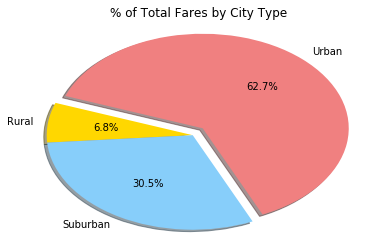

In [768]:
# Build Pie Chart
plt.title("% of Total Fares by City Type")

labels = "Rural", "Suburban",  "Urban"
sizes = total_fares_by_city_type
colors = "gold", "lightskyblue", "lightcoral" 
explode = (0, 0, 0.1)

plt.pie(sizes, labels = labels, colors = colors, explode = explode, startangle=160, shadow=True, autopct='%1.1f%%')
plt.axis("auto")

# Save Figure
plt.savefig("data/Total_Fares_by_City_Type.png")

In [769]:
# Show Figure
plt.show()

## Total Rides by City Type

In [770]:
# Calculate Ride Percents
total_rides_by_city_type = pyber_df.set_index("type")
total_rides_by_city_type = total_rides_by_city_type.groupby(["type"])
total_rides_by_city_type = total_rides_by_city_type["city"].count()

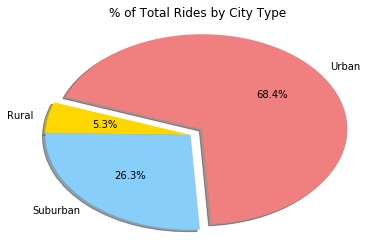

In [771]:
# Build Pie Chart
plt.title("% of Total Rides by City Type")

labels = "Rural", "Suburban",  "Urban"
sizes = total_rides_by_city_type
colors = "gold", "lightskyblue", "lightcoral" 
explode = (0, 0, 0.1)

plt.pie(sizes, labels = labels, colors = colors, explode = explode, startangle=160, shadow=True, autopct='%1.1f%%')
plt.axis("auto")

# Save Figure
plt.savefig("data/Total_Rides_by_City_Type.png")

In [772]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [773]:
# Calculate Driver Percents
total_drivers_by_city_type = pyber_df.set_index("type")
total_drivers_by_city_type = total_drivers_by_city_type.drop_duplicates(subset=["city"], keep="first")
total_drivers_by_city_type = total_drivers_by_city_type.groupby(["type"]).sum()
total_drivers_by_city_type = total_drivers_by_city_type["driver_count"]

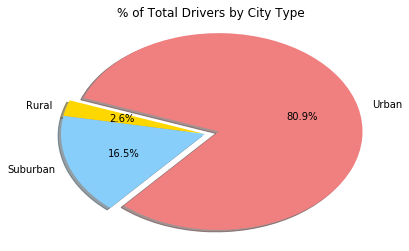

In [774]:
# Build Pie Chart
plt.title("% of Total Drivers by City Type")

labels = "Rural", "Suburban",  "Urban"
sizes = total_drivers_by_city_type
colors = "gold", "lightskyblue", "lightcoral" 
explode = (0, 0, 0.1)

plt.pie(sizes, labels = labels, colors = colors, explode = explode, startangle=160, shadow=True, autopct='%1.1f%%')
plt.axis("auto")

# Save Figure
plt.savefig("data/Total_Drivers_by_City_Type.png")

In [775]:
# Show Figure
plt.show()